<a href="https://colab.research.google.com/github/vikrantpotnis123/DS/blob/master/conv2D_basic_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

2.2.0


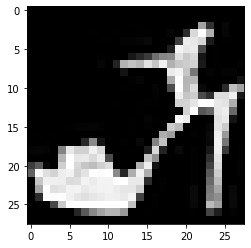

In [26]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.set_printoptions(linewidth=200)

# Use Fashion mnist in place of mnist
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

plt.imshow(training_images[9], cmap='gray')

training_images, test_images = training_images / 255.0, test_images / 255.0

# this needs to be done as the firstm convolution
# expects a single tensor containing everything
training_images=training_images.reshape(60000, 28, 28, 1)


In [21]:
# define callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.985):
      print("\nReached 98.5% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

  Flatten 0 just takes square image matrix and turns it into a 1 dimensional set.

  Dense - adds a layer of neurons
  Dense implements the operation: 
  output = activation(dot(input, kernel) + bias) 
  where activation is the element-wise activation function passed 
  as the activation argument, 
  kernel is a weights matrix created by the layer, and 
  bias is a bias vector created by the layer 
  (only applicable if use_bias is True)
    check the help for details but output has dimensions [batch_size, d0, units]
  when input dimensions are [batch_size, d0, d1]
  so here the first argument is the the 'units'

  Softmax takes a set of values, and effectively picks the biggest one, so, 
  for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
  it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] 
  
  Relu = if x > 0 return x else return 0
  

In [33]:
# define the model

# Sequential: That defines a SEQUENCE of layers in the neural network
model = tf.keras.models.Sequential([
      # convolution layers
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      
      # tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

## Notice how easy it is to just add conv2D layers in order to define the model!
### Note that our convolutional filter is a 3x3 matrix 

In [24]:

# compile the model with a cost/loss function and an optimizer (gradient descent)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# finally train the model
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.4432 - accuracy: 0.8390
Epoch 2/20
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2919 - accuracy: 0.8934
Epoch 3/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2471 - accuracy: 0.9082
Epoch 4/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2161 - accuracy: 0.9201
Epoch 5/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1893 - accuracy: 0.9298
Epoch 6/20
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1661 - accuracy: 0.9371
Epoch 7/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1478 - accuracy: 0.9437
Epoch 8/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1273 - accuracy: 0.9525
Epoch 9/20
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1150 - accuracy: 0.9564
Epoch 10/20
1875/1875 [==============================] - 73s 39m

In [29]:
test_images=test_images.reshape(10000, 28, 28, 1)
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.5195 - accuracy: 0.9152


[0.5194834470748901, 0.9151999950408936]

In [30]:
classifications = model.predict(test_images)
print(classifications[0])

[1.5659701e-15 7.1190120e-22 1.9638524e-22 8.8638146e-21 6.5536829e-24 1.0087086e-15 4.9909026e-22 1.5200233e-12 5.1683072e-20 1.0000000e+00]


The output of the model is a list of 10 numbers. 

These numbers are a probability that the value being classified is the corresponding value 

Check:
(https://github.com/zalandoresearch/fashion-mnist#labels).

The first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. 

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.
The rest are very low probabilities.

In [31]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4
 2]


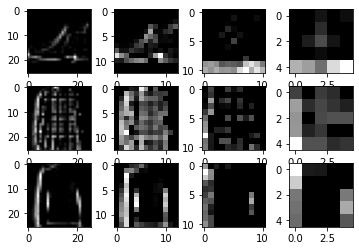

In [37]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[2,x].grid(False)

  The print (test_labels[;100]) shows us the first 100 labels in the test set.  
  The ones at index 0, index 23 and index 28 are all the same value (9).

  They're all shoes. 

  Each convolution run (see above) shows common features emerging.
  The size of th image is going lower and lower as move row wise.

  Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.